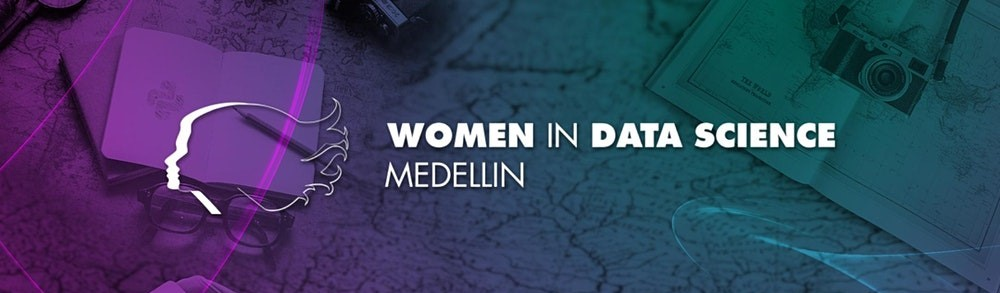

# ETL en la nube: Un nuevo entorno para nuestros datos

Datos: https://www.kaggle.com/dhruvildave/billboard-the-hot-100-songs

Billboard Hot 100 es la lista de discos estándar de la industria de la música en los Estados Unidos para canciones, publicada semanalmente por la revista Billboard. Las clasificaciones de las listas se basan en las ventas, la reproducción de radio y la transmisión en línea en los Estados Unidos.

Cada semana, Billboard publica la lista "The Hot 100" de canciones que fueron tendencia en ventas y difusión durante esa semana. Este conjunto de datos es una colección de todos los gráficos "The Hot 100" publicados desde su creación en 1958.

### Importar librerias

In [27]:
#Procesamiento
import pandas as pd
import numpy as np

### Cargar datos

In [4]:
pathInput = 's3://etl-wids/Extract/'

In [5]:
data = pd.read_csv(pathInput+'charts.csv')

### Transformación

In [6]:
data.head()

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17


In [7]:
data.describe()

,rank,last-week,peak-rank,weeks-on-board
count,328487.000000,296422.000000,328487.000000,328487.000000
mean,50.500933,47.601197,41.007154,9.152472
std,28.866094,28.056956,29.349247,7.596439
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,14.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,87.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328487 entries, 0 to 328486
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rank            328487 non-null  int64  
 1   song            328487 non-null  object 
 2   artist          328487 non-null  object 
 3   last-week       296422 non-null  float64
 4   peak-rank       328487 non-null  int64  
 5   weeks-on-board  328487 non-null  int64  
 6   date            328487 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 17.5+ MB


In [9]:
data[data['last-week'].isnull()]

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
13,14,Am I The Only One,Aaron Lewis,NaN,14,1,2021-07-17
48,49,Wasting Time,Brent Faiyaz Featuring Drake,NaN,49,1,2021-07-17
72,73,Renegade,Big Red Machine Featuring Taylor Swift,NaN,73,1,2021-07-17
80,81,Cry No More,G Herbo Featuring Polo G & Lil Tjay,NaN,81,1,2021-07-17
81,82,Essence,Wizkid Featuring Tems,NaN,82,1,2021-07-17
...,...,...,...,...,...,...,...
328482,96,Over And Over,Thurston Harris,NaN,96,1,1958-08-04
328483,97,I Believe In You,Robert & Johnny,NaN,97,1,1958-08-04
328484,98,Little Serenade,The Ames Brothers,NaN,98,1,1958-08-04
328485,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,1958-08-04


Los valores nulos en la columna 'last-week' representan las canciones que aparecen por primera vez en la lista del top 100, por lo tanto no cuentan con una posición en el ranking de la semana anterior.

Estos valores serán reemplazados por un 0 en la columna:

In [12]:
data['last-week'].fillna(0, inplace=True)
data['last-week'].isnull().sum()

0

Se creará una columna que describe el comportamiento de la canción de acuerdo a su posición actual y la posición de la última semana:

In [28]:
data["efficiency"] = np.where(data['last-week'] - data['rank'] > 0, 'Up', 
         (np.where(data['last-week'] - data['rank'] < 0, 'Down', 'Equal')))

In [29]:
data.sample(5)

,rank,song,artist,last-week,peak-rank,weeks-on-board,date,efficiency
65577,78,Down The Road,Kenny Chesney With Mac McAnally,85.0,78,2,2008-12-27,Up
289721,35,Lies,The Knickerbockers,40.0,35,6,1966-01-08,Up
40087,88,Best Song Ever,One Direction,84.0,2,15,2013-11-16,Down
54599,100,"For You, And Your Denial",Yellowcard,0.0,100,1,2011-02-05,Down
286181,95,Changes,Crispian St. Peters,0.0,95,1,1966-09-17,Down


### Guardar datos

In [31]:
pathOutput = 's3://etl-wids/Load/'

In [32]:
data.to_csv(pathOutput+'dataCurada.csv')